In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score

In [ ]:
pd.set_option('display.max_columns', None)


#Đọc file

In [ ]:
data = pd.read_csv('/content/kc_house_data.csv')
print(data.shape)
data.head(5)

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

| Tên cột           | Ý nghĩa                                                                                              |
| ----------------- | ---------------------------------------------------------------------------------------------------- |
| **id**            | Mã định danh duy nhất của mỗi căn nhà.                                                               |
| **date**          | Ngày căn nhà được bán                                       |
| **price**         | Giá bán của căn nhà (đơn vị: USD).                           |
| **bedrooms**      | Số lượng phòng ngủ.                                                                                  |
| **bathrooms**     | Số lượng phòng tắm (có thể là số thập phân, ví dụ: 1.5 = 1 phòng tắm đầy đủ và 1 phòng vệ sinh nhỏ). |
| **sqft_living**   | Diện tích sử dụng của căn nhà (square feet – đơn vị diện tích ở Mỹ, tương đương ~0.0929 m²).         |
| **sqft_lot**      | Diện tích tổng của lô đất (bao gồm nhà, sân, vườn,...).                                              |
| **floors**        | Số tầng (có thể là số thập phân nếu có tầng lửng, ví dụ: 1.5).                                       |
| **waterfront**    | Có nằm gần mặt nước (biển, hồ) hay không (1 = có, 0 = không).                                        |
| **view**          | Mức độ tầm nhìn (đánh giá từ 0–4, càng cao thì view càng đẹp).                                       |
| **condition**     | Tình trạng tổng thể của căn nhà (đánh giá từ 1–5, 1 là rất tệ, 5 là rất tốt).                        |
| **grade**         | Mức độ chất lượng xây dựng và thiết kế nội thất (đánh giá từ 1–13 theo thang của King County).       |
| **sqft_above**    | Diện tích phần trên mặt đất (không tính tầng hầm).                                                   |
| **sqft_basement** | Diện tích tầng hầm (nếu có).                                                                         |
| **yr_built**      | Năm xây dựng căn nhà.                                                                                |
| **yr_renovated**  | Năm gần nhất căn nhà được tu sửa (0 nếu chưa từng tu sửa).                                           |
| **zipcode**       | Mã vùng bưu điện của khu vực (giúp xác định vị trí địa lý).                                          |
| **lat**           | Vĩ độ (latitude) của căn nhà.                                                                        |
| **long**          | Kinh độ (longitude) của căn nhà.                                                                     |
| **sqft_living15** | Diện tích phòng ở trung bình của 15 hàng xóm gần nhất của ngôi nhà đó.                  |
| **sqft_lot15**    | Diện tích lô đất trung bình của 15 hàng xóm gần nhất của ngôi nhà đó.                       |


In [ ]:
# Tạo một bản sao của data
df = data.copy()
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#Tiền xử lý dữ liệu

##Chuẩn hoá định dạng cho cột Date

In [ ]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%dT%H%M%S')

##Kiểm tra dữ liệu thiếu

In [ ]:
df.isnull().sum()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


##Kiểm tra trùng lặp

In [ ]:
#Kiểm tra trùng lặp
df.duplicated().sum()

np.int64(0)

In [ ]:
#Kiểm tra trùng lặp cột id
df.duplicated('id').sum()

np.int64(177)

In [ ]:
# Lấy ra các giá trị bị trùng cột id
duplicates = df[df['id'].duplicated(keep=False)].sort_values('id')
duplicates[['id','date','price']]

,id,date,price
2496,1000102,2014-09-16,280000.0
2497,1000102,2015-04-22,300000.0
16814,7200179,2014-10-16,150000.0
16815,7200179,2015-04-24,175000.0
11433,109200390,2014-08-20,245000.0
...,...,...,...
6345,9828200460,2014-06-27,260000.0
15200,9834200305,2015-02-10,615000.0
15199,9834200305,2014-07-16,350000.0
1086,9834200885,2015-04-20,550000.0


Sau khi kiểm tra trùng lặp cột id. Ta thấy có 177 dòng trùng id nhưng khi kiểm tra thì giá bán và ngày bán không trùng nhau. Từ đây suy ra các căn nhà này đã được bán lại nhiều lần

In [ ]:
# Lấy ra các giá trị bị trùng id và ngày bán
duplicates = df[df[['id','date']].duplicated(keep=False)].sort_values('id')
duplicates

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


Không có dòng nào bị trùng cả id và ngày bán nên suy ra các căn nhà đã được bán lại nhiều lần

Việc một căn nhà được bán nhiều lần phản ánh nhiều giao dịch của cùng một tài sản.
Mục đích: Để xây dựng mô hình Hồi quy Tuyến tính dự báo giá nhà tại một thời điểm thị trường, mỗi quan sát trong tập huấn luyện cần phải là một đơn vị độc lập

-> Loại bỏ các bản ghi cũ hơn và chỉ giữ lại giao dịch mới nhất. Giao dịch gần nhất phản ánh giá thị trường hiện tại và tình trạng cập nhật nhất của căn nhà, từ đó đảm bảo mô hình dự đoán giá trị có tính thời sự và độ chính xác cao nhất.

In [ ]:
# Xoá các bản ghi có id trùng nhau và date cũ hơn
df = df.sort_values(by=['id', 'date'], ascending=True)
df = df.drop_duplicates(subset=['id'], keep='last')

In [ ]:
df.duplicated('id').sum()

np.int64(0)

##Chuẩn hoá kiểu dữ liệu

In [ ]:
# Chuyển cột id và zipcode sang kiểu object
df['id'] = df['id'].astype('object')
df['zipcode'] = df['zipcode'].astype('object')
# Chuyển cột waterfront, view,condition, grade sang kiểu phân loại
ds = ['waterfront','view','condition','grade']
df[ds] = df[ds].astype('category')

#Phân tích mô tả

In [ ]:
# Kiểm tra thông tin dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21436 entries, 2497 to 15951
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21436 non-null  object        
 1   date           21436 non-null  datetime64[ns]
 2   price          21436 non-null  float64       
 3   bedrooms       21436 non-null  int64         
 4   bathrooms      21436 non-null  float64       
 5   sqft_living    21436 non-null  int64         
 6   sqft_lot       21436 non-null  int64         
 7   floors         21436 non-null  float64       
 8   waterfront     21436 non-null  category      
 9   view           21436 non-null  category      
 10  condition      21436 non-null  category      
 11  grade          21436 non-null  category      
 12  sqft_above     21436 non-null  int64         
 13  sqft_basement  21436 non-null  int64         
 14  yr_built       21436 non-null  int64         
 15  yr_renovated   21436 

##Phân tích tương quan

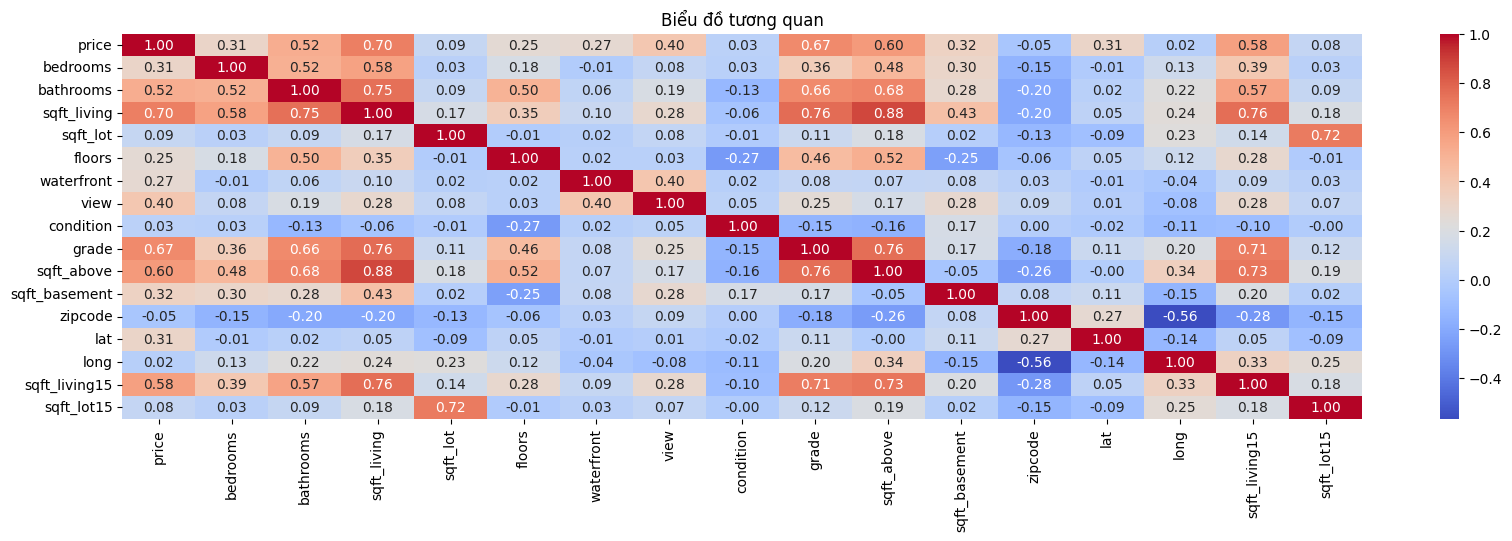

In [ ]:
corr = df.drop(columns = ['id','date','yr_built','yr_renovated']).corr()
plt.figure(figsize=(20,5))
sns.heatmap(corr, annot = True, fmt = '.2f',cmap='coolwarm')
plt.title('Biểu đồ tương quan')
plt.show()

1. Tương Quan Mạnh với Biến Mục Tiêu (price)
Ma trận cho thấy mức độ tương quan (hàng đầu tiên) của các biến độc lập với price (Giá nhà). Những biến này là yếu tố dự báo tốt nhất:

* sqft_living (0.70): Có mối tương quan tuyến tính dương mạnh nhất với giá nhà. Điều này khẳng định diện tích không gian sống là yếu tố quan trọng nhất.

* grade (0.67): Tương quan dương mạnh. Cấp chất lượng xây dựng là yếu tố dự báo mạnh thứ hai, cho thấy chất lượng cấu trúc và thiết kế có vai trò quyết định.

* sqft_above (0.6): Tương quan mạnh, tương tự như sqft_living, cho thấy diện tích trên mặt đất rất quan trọng.

* bathrooms (0.52) và sqft_living15 (0.58): Có mối tương quan dương khá mạnh. Đặc điểm phòng tắm và diện tích nhà hàng xóm gần nhất đều ảnh hưởng tích cực đến giá nhà.

2. Tương Quan Yếu với Biến Mục Tiêu
* sqft_lot (0.09) và sqft_lot15 (0.08): Tương quan rất yếu với giá nhà. Điều này gợi ý rằng kích thước lô đất không phải là yếu tố quan trọng để xác định giá nhà ở khu vực King County (có thể do mật độ xây dựng cao).

* condition (0.03) và was_renovated (0.13): Có tương quan yếu. Điều kiện tổng thể của ngôi nhà và năm cải tạo dường như không có ảnh hưởng tuyến tính lớn đến giá.

Vấn đề Đa Cộng Tuyến           

* sqft_living vs sqft_above là 0.88,"Đây là mức đa cộng tuyến rất cao. Nếu giữ cả hai, mô hình hồi quy tuyến tính sẽ không ổn định và các hệ số (β) sẽ khó giải thích. Nên loại bỏ sqft_above và chỉ giữ lại sqft_living, vì sqft_living có tương quan mạnh hơn với price (0.70>0.6).       

* sqft_living vs sqft_living15 là 0.76,"Đây cũng là mức đa cộng tuyến cao, giữ lại sqft_living (tương quan 0.70 với price) và loại bỏ sqft_living15 (tương quan 0.58 với price).

* grade vs sqft_living là 0.76. Mối quan hệ tương quan mạnh. Giữ lại cả hai vì chúng đại diện cho hai đặc điểm khác nhau (chất lượng vs kích thước)

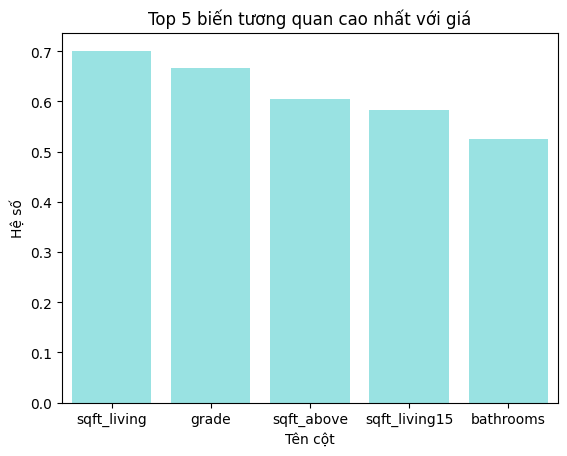

In [ ]:
# Hiện top 5 biến có tương quan mạnh nhất với price
top5 = corr['price'].drop('price').sort_values(ascending= False).head(5)
sns.barplot(x = top5.index, y = top5.values, color = '#8DEEEE')
plt.title('Top 5 biến tương quan cao nhất với giá')
plt.xlabel('Tên cột')
plt.ylabel('Hệ số')
plt.show()

##Bảng thống kê

In [ ]:
# Chọn các cột số
df_numeric = df.select_dtypes(include = 'number')
print(df_numeric.columns)

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat',
       'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [ ]:
# Tính 11 độ đo
mean = df_numeric.mean()
median = df_numeric.median()
mode = df_numeric.mode().iloc[0]
min = df_numeric.min()
max = df_numeric.max()
Q1 = df_numeric.quantile(0.25)
Q2 = df_numeric.quantile(0.5)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1
std = df_numeric.std()
var = df_numeric.var()
# Tạo bảng thống kê
def thong_ke(mean,median,mode,min,max,Q1,Q2,Q3,IQR,std,var):
  data = {'Mean': list(mean),
          'Median': list(median),
          'Mode': list(mode),
          'Min': list(min),
          'Max': list(max),
          'Q1': list(Q1),
          'Q2': list(Q2),
          'Q3': list(Q3),
          'IQR': list(IQR),
          'std': list(std),
          'var': list(var)
          }
  df1 = pd.DataFrame(data)
  df1.index = df_numeric.columns
  df_complete = df1.transpose()
  return df_complete
df_complete = thong_ke(mean,median,mode,min,max,Q1,Q2,Q3,IQR,std,var)
df_complete

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
Mean,5.417449e+05,3.371571,2.117349,2082.704936,1.513564e+04,1.496198,1790.960440,291.744495,1971.098433,84.729800,47.560156,-122.213697,1988.314378,1.278596e+04
Median,4.500000e+05,3.000000,2.250000,1920.000000,7.614000e+03,1.500000,1560.000000,0.000000,1975.000000,0.000000,47.572000,-122.230000,1840.000000,7.620000e+03
Mode,4.500000e+05,3.000000,2.500000,1300.000000,5.000000e+03,1.000000,1300.000000,0.000000,2014.000000,0.000000,47.532200,-122.290000,1540.000000,5.000000e+03
Min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,6.510000e+02
Max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,8.712000e+05
Q1,3.248660e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1200.000000,0.000000,1952.000000,0.000000,47.471100,-122.328000,1490.000000,5.100000e+03
Q2,4.500000e+05,3.000000,2.250000,1920.000000,7.614000e+03,1.500000,1560.000000,0.000000,1975.000000,0.000000,47.572000,-122.230000,1840.000000,7.620000e+03
Q3,6.450000e+05,4.000000,2.500000,2550.000000,1.069625e+04,2.000000,2220.000000,560.000000,1997.000000,0.000000,47.678000,-122.124000,2370.000000,1.008725e+04
IQR,3.201340e+05,1.000000,0.750000,1120.000000,5.656250e+03,1.000000,1020.000000,560.000000,45.000000,0.000000,0.206900,0.204000,880.000000,4.987250e+03
std,3.675513e+05,0.929205,0.769913,919.146469,4.153862e+04,0.540388,829.026491,442.781983,29.385277,402.431012,0.138601,0.140896,685.699093,2.737547e+04


Các cột `lat` và `long` có phân phối hẹp, nằm trong khu vực địa lý cố định nên ít khả năng có ngoại lai. Cột `yr_built` có giá trị nằm trong khoảng thời gian hợp lý (từ 1900 đến 2015), không có giá trị bất thường. Còn `yr_renovated` tuy phần lớn là 0 nhưng các giá trị khác đều là năm hợp lệ, không vượt quá giới hạn thực tế. Nhìn chung, các cột này đều **không có dấu hiệu ngoại lai rõ rệt**. Ta sẽ dùng biểu đồ boxplot để trực quan các cột còn lại để đánh giá các cột có ngoại lai không     
Các biến còn lại như sqft_living15, sqft_lot15, và sqft_above có mối liên hệ với hai biến sqft_living, sqft_lot trên. Do đó, tôi cho rằng không cần thiết phải xét ngoại lai riêng cho các biến này, nhằm tránh xử lý trùng lặp và giữ nguyên cấu trúc tự nhiên của dữ liệu.



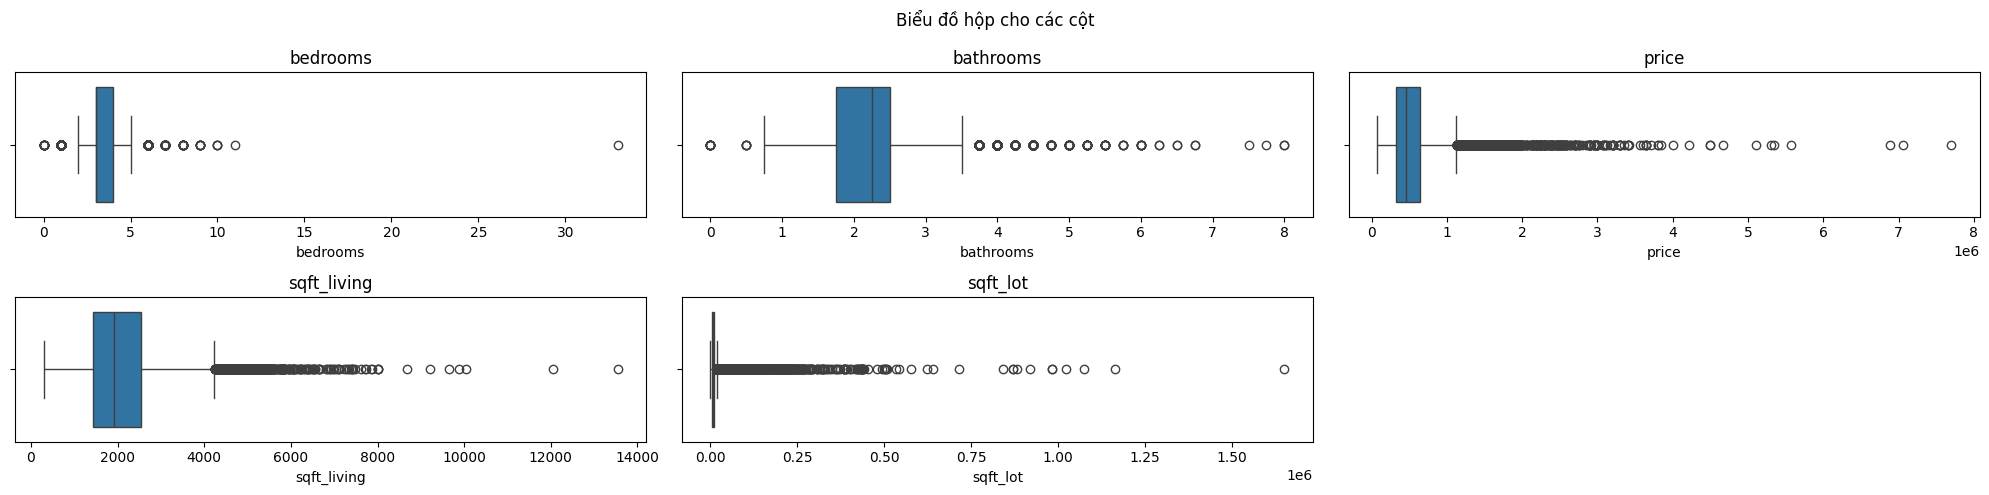

In [ ]:
# Vẽ biểu đồ boxplot cho các cột còn lại
cols = ['bedrooms','bathrooms','price','sqft_living','sqft_lot']
# Vẽ biểu đồ
plt.figure(figsize=(20,5))
for i, column in enumerate(cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=df[column])
    plt.title(column)
plt.suptitle('Biểu đồ hộp cho các cột')
plt.tight_layout()
plt.show()

1. bathrooms

Quan sát: có rất nhiều điểm nằm bên phải râu (số phòng tắm rất cao, tới 7+).

Khả năng:

Một số là hợp lý (biệt thự, căn hộ lớn, có 3-5 phòng tắm phổ biến ở nhà lớn).

Một số có thể lỗi (Nếu bathrooms = 8 nhưng sqft_living nhỏ).


2. bedrooms

Quan sát: phần lớn cluster quanh 3–4; có vài điểm bất thường lớn (> 10).

 Có giá trị rất lớn > 30 thường là lỗi nhập. Nếu đúng phải tương ứng với sqft_living rất lớn.    
Các căn nhà có bedrooms = 0 và bathrooms = 0 có thể là: Bất động sản không phải nhà ở: Chủ yếu là lô đất trống hoặc nhà studio/căn hộ hiệu suất cực nhỏ.
4. price

Quan sát: một dải giá rất lớn bên phải (vài triệu USD).

Khả năng:

Có những giá hợp lý cho khu đắt đỏ; cũng có giá cực nhỏ (nếu có) là lỗi.


5. sqft_living

Quan sát: nhiều điểm diện tích cực lớn (kéo boxplot rộng về phải).

Khả năng:

Một số là nhà thực sự rất to → giữ nếu price tương ứng cao.


Xét cột bathrooms

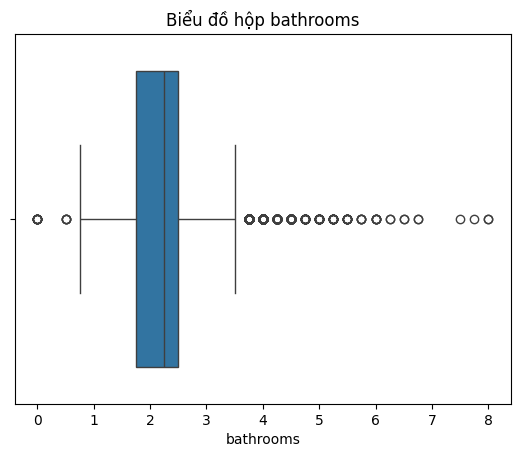

In [ ]:
# Vẽ biểu đồ
sns.boxplot(x=df['bathrooms'])
plt.title('Biểu đồ hộp bathrooms')
plt.show()

In [ ]:
# Xem các giá trị bathrooms > 5
loc = df[df['bathrooms'] > 5]
loc[['bathrooms','sqft_living','floors']]

,bathrooms,sqft_living,floors
5024,5.25,4140,2.0
8546,7.50,4050,2.0
20578,6.50,6260,2.0
3100,5.50,6550,1.0
13314,5.25,4590,1.0
4035,6.00,4340,2.0
7035,5.50,7050,1.0
20452,5.50,6530,2.0
12777,8.00,13540,3.0
1164,5.25,8010,2.0




 1. Phân tích tổng quát

Từ bảng dữ liệu, phần lớn các mẫu có:

* `bathrooms` > 5
* `floors` trong khoảng 1–2 (chủ yếu là 2 tầng)
* `sqft_living` dao động rất lớn, từ **2860 đến 13540 sqft**

Như vậy, ta chia làm **hai nhóm rõ rệt**:

 Nhóm 1 – Hợp lý (không phải ngoại lai thật)

Những căn có diện tích **trên 5000 sqft** và `bathrooms` cao (5–8 phòng tắm), thuộc loại **biệt thự sang**.
Ví dụ:

| index | bathrooms | sqft_living | floors |
| ----- | --------- | ----------- | ------ |
| 1164  | 5.25      | 8010        | 2      |
| 1315  | 6.0       | 7390        | 2      |
| 12777 | 8.0       | 13540       | 3      |
| 14556 | 6.25      | 8670        | 2      |
| 8092  | 6.75      | 9640        | 1      |
| 9254  | 7.75      | 9890        | 2      |
| 7252  | 8.0       | 12050       | 2.5    |

→ Đây **không phải ngoại lai thật**, vì:

* Diện tích nhà rất lớn, tương ứng hợp lý với số lượng phòng tắm cao.
* Một số nhà có 2–3 tầng, phù hợp với mô hình biệt thự (mỗi phòng ngủ có phòng tắm riêng).
  → Giữ lại các giá trị này trong phân tích.


 Nhóm 2 – Bất thường (ngoại lai thật)

Các mẫu có `bathrooms` > 5 nhưng diện tích **nhỏ hơn 4500 sqft**, đặc biệt nếu chỉ có **1–2 tầng**.
Ví dụ:

| index | bathrooms | sqft_living | floors |
| ----- | --------- | ----------- | ------ |
| 4598  | 5.25      | 3600        | 2      |
| 5024  | 5.25      | 4140        | 2      |
| 15751 | 5.75      | 3700        | 2      |
| 16803 | 5.25      | 2860        | 2      |
| 20096 | 5.25      | 3410        | 2      |

→ Đây **là ngoại lai thực sự**, vì:

* Diện tích nhỏ không đủ để bố trí số lượng phòng tắm cao như vậy.
* Rất có thể do **lỗi nhập liệu**
* Nếu giữ lại, sẽ làm **méo phân phối dữ liệu**, ảnh hưởng đến trung bình và mô hình hồi quy sau này.


 2. Nhận xét


> Khi kiểm tra boxplot của biến `bathrooms`, có nhiều giá trị nằm ngoài râu trên (trên 5 phòng tắm). Tuy nhiên, không phải tất cả đều là ngoại lai thật. Sau khi đối chiếu với diện tích sử dụng (`sqft_living`) và số tầng (`floors`), có thể chia làm hai nhóm:
>
> * Các căn có diện tích lớn (≥ 5000 sqft) và nhiều tầng là biệt thự cao cấp, do đó các giá trị như 5–8 phòng tắm là hợp lý.
> * Ngược lại, một số căn có diện tích nhỏ (< 4500 sqft) nhưng lại có trên 5 phòng tắm được xem là **bất thường** vì không phù hợp với quy mô diện tích và cấu trúc nhà.
>
> Vì vậy, các bản ghi có `bathrooms > 5` và `sqft_living < 4500` được xác định là **ngoại lai thực sự** và bị loại bỏ khỏi tập dữ liệu nhằm đảm bảo tính hợp lý và độ tin cậy của mô hình phân tích.



In [ ]:
# Xoá các bản ghi mà bathrooms > 5 và sqft_living < 4500
ngoai_lai = df[(df['bathrooms'] > 5) & (df['sqft_living'] < 4500)]
df =df.drop(ngoai_lai.index)

Xét cột bedrooms

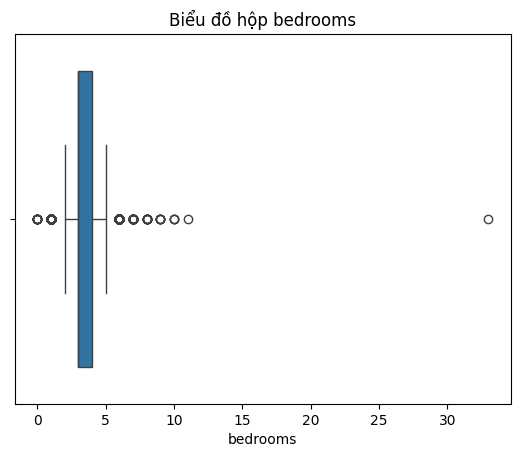

In [ ]:
# Vẽ biểu đồ
sns.boxplot(x=df['bedrooms'])
plt.title('Biểu đồ hộp bedrooms')
plt.show()

In [ ]:
# Xem các giá trị bedrooms > 6
loc = df[df['bedrooms'] > 6]
loc[['bedrooms','sqft_living']]

,bedrooms,sqft_living
9732,7,3440
12017,7,5100
13314,10,4590
7023,7,3260
12777,7,13540
17235,8,4440
18477,8,7710
10275,7,2690
9132,7,2660
10958,8,4040


Trong quá trình kiểm tra cột bedrooms, nhóm phát hiện giá trị ngoại lai 33 phòng ngủ, trong khi diện tích chỉ 1620 sqft.
Đây là giá trị phi thực tế, có khả năng do lỗi nhập liệu. Vì vậy, bản ghi này được loại bỏ khỏi tập dữ liệu.
Các giá trị 7–11 phòng ngủ vẫn được giữ lại do phù hợp với loại hình nhà biệt thự tại khu vực King County.

In [ ]:
# Xoá bản ghi có bedrooms = 33
df = df.drop(index = 15870)

Xét cột price

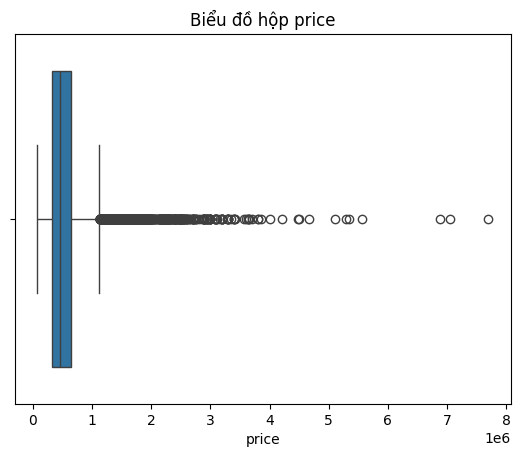

In [ ]:
# Vẽ biểu đồ
sns.boxplot(x=df['price'])
plt.title('Biểu đồ hộp price')
plt.show()

In [ ]:
# Hiển thị các bản ghi có price lớn hơn 3.5tr
loc = df[df['price'] > 3000000]
loc[['price','sqft_living','grade','view','waterfront']]

,price,sqft_living,grade,view,waterfront
20295,3200000.0,4810,11,3,0
10465,3120000.0,4490,12,4,1
15482,3200000.0,7000,12,4,1
7035,3800000.0,7050,13,2,0
7907,3200000.0,7100,13,0,0
10446,3400000.0,4260,11,0,0
1164,5110000.0,8010,12,4,1
18477,3300000.0,7710,12,0,0
15258,3070000.0,4150,11,4,0
8092,4670000.0,9640,12,4,1


Kết quả phân tích cho thấy biến price có một số giá trị cao vượt trội so với phần lớn dữ liệu. Tuy nhiên, khi đối chiếu với các đặc điểm liên quan như diện tích sử dụng (sqft_living), cấp độ chất lượng xây dựng (grade), vị trí ven hồ (waterfront) và tầm nhìn (view), các giá trị này phản ánh đúng thực tế của những căn nhà cao cấp. Do đó, chúng không được xem là lỗi nhập liệu mà là các giá trị hợp lý phản ánh sự khác biệt thật trong thị trường nhà ở. Vì vậy, các bản ghi này được giữ lại để đảm bảo tính toàn vẹn của dữ liệu.

Xét cột sqft_living

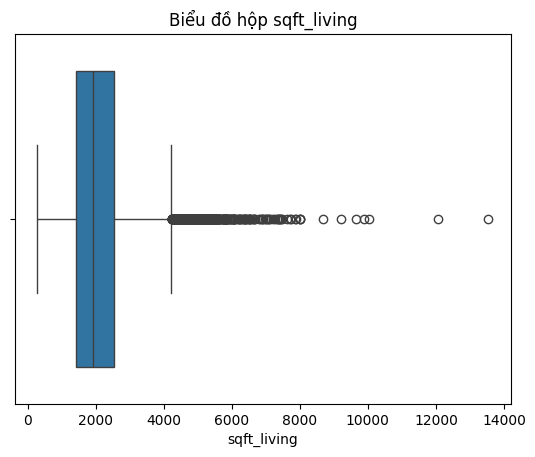

In [ ]:
# Vẽ biểu đồ
sns.boxplot(x=df['sqft_living'])
plt.title('Biểu đồ hộp sqft_living')
plt.show()

In [ ]:
df[df['sqft_living'] > 8000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
12777,1225069038,2014-05-05,2280000.0,7,8.00,13540,307752,3.0,0,4,3,12,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800
1164,1247600105,2014-10-20,5110000.0,5,5.25,8010,45517,2.0,1,4,3,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8092,1924059029,2014-06-17,4670000.0,5,6.75,9640,13068,1.0,1,4,3,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
14556,2303900035,2014-06-11,2890000.0,5,6.25,8670,64033,2.0,0,4,3,13,6120,2550,1965,2003,98177,47.7295,-122.372,4140,81021
4411,2470100110,2014-08-04,5570000.0,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
18302,6072800246,2014-07-02,3300000.0,5,6.25,8020,21738,2.0,0,0,3,11,8020,0,2001,0,98006,47.5675,-122.189,4160,18969
7252,6762700020,2014-10-13,7700000.0,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
9254,9208900037,2014-09-19,6890000.0,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
3914,9808700762,2014-06-11,7060000.0,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449


Kiểm tra các giá trị sqft_living > 8000 cho thấy hầu hết là biệt thự lớn với giá cao tương ứng. Tuy nhiên, bản ghi id = 1225069038 có diện tích 13.540 sqft nhưng giá chỉ 2.280.000 USD, lệch khỏi xu hướng chung. Do đó, tôi loại bỏ bản ghi này để đảm bảo dữ liệu phù hợp hơn cho mô hình hồi quy.

In [ ]:
df = df.drop(index = 12777)

Xét cột sqft_lot

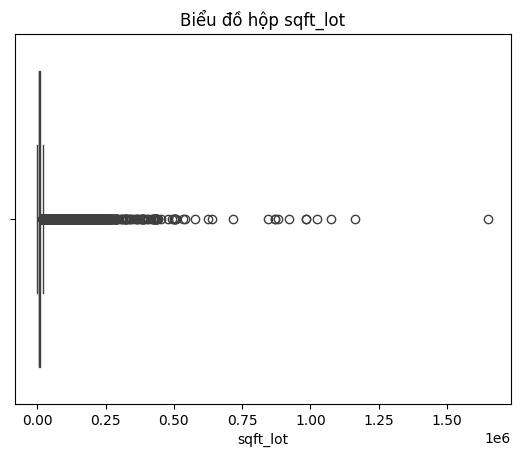

In [ ]:
# Vẽ biểu đồ
sns.boxplot(x=df['sqft_lot'])
plt.title('Biểu đồ hộp sqft_lot')
plt.show()

In [ ]:
df[df['sqft_lot'] > 700000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
9714,225079036,2015-01-07,937500.0,4,4.00,5545,871200,2.0,0,0,3,11,3605,1940,2003,0,98014,47.6760,-121.882,3420,871200
13006,619079096,2015-04-06,750000.0,3,2.50,2350,715690,1.5,0,0,4,9,2350,0,1979,0,98022,47.1622,-121.971,1280,325393
3949,722069232,2014-09-05,998000.0,4,3.25,3770,982998,2.0,0,0,3,10,3770,0,1992,0,98058,47.4140,-122.087,2290,37141
1719,1020069017,2015-03-27,700000.0,4,1.00,1300,1651359,1.0,0,3,4,6,1300,0,1920,0,98022,47.2313,-122.023,2560,425581
20452,1125079111,2015-04-15,1600000.0,4,5.50,6530,871200,2.0,0,2,3,11,6530,0,2008,0,98014,47.6640,-121.878,1280,858132
7769,2323089009,2015-01-19,855000.0,4,3.50,4030,1024068,2.0,0,0,3,10,4030,0,2006,0,98045,47.4619,-121.744,1830,11700
4540,2522029039,2014-09-29,550000.0,3,2.00,3650,843309,2.0,0,0,4,7,3650,0,1991,0,98070,47.3627,-122.496,1870,273992
7647,2623069031,2014-05-21,542500.0,5,3.25,3010,1074218,1.5,0,0,5,8,2010,1000,1931,0,98027,47.4564,-122.004,2450,68825
6691,2624089007,2015-03-20,2000000.0,2,2.50,3900,920423,2.0,0,0,3,12,3900,0,2009,0,98065,47.5371,-121.756,2720,411962
7077,2724079090,2015-01-05,1650000.0,4,3.25,3920,881654,3.0,0,3,3,11,3920,0,2002,0,98024,47.5385,-121.896,2970,112384


Biến sqft_lot có nhiều giá trị ngoại lệ với diện tích đất rất lớn. Một số dòng như index 1719 và 17319 có diện tích đất cao nhưng diện tích sử dụng và giá thấp, cho thấy khả năng là đất chưa khai thác hoặc nhà cấp thấp.


##Khám phá dữ liệu

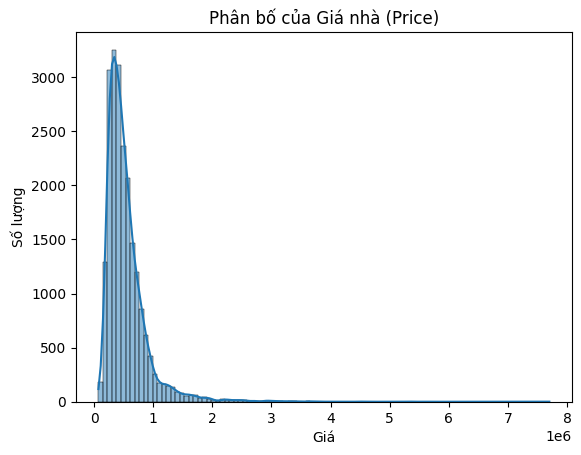

In [ ]:
# Phân bố giá nhà
sns.histplot(df['price'], bins=100, kde=True)
plt.title('Phân bố của Giá nhà (Price)')
plt.xlabel('Giá')
plt.ylabel('Số lượng')
plt.show()

hầu hết các nhà có giá ở mức thấp đến trung bình < 1 triệu, nhưng có một "cái đuôi" dài gồm một số ít các bất động sản siêu đắt khoảng từ 2 triệu đến gần 8 triệu

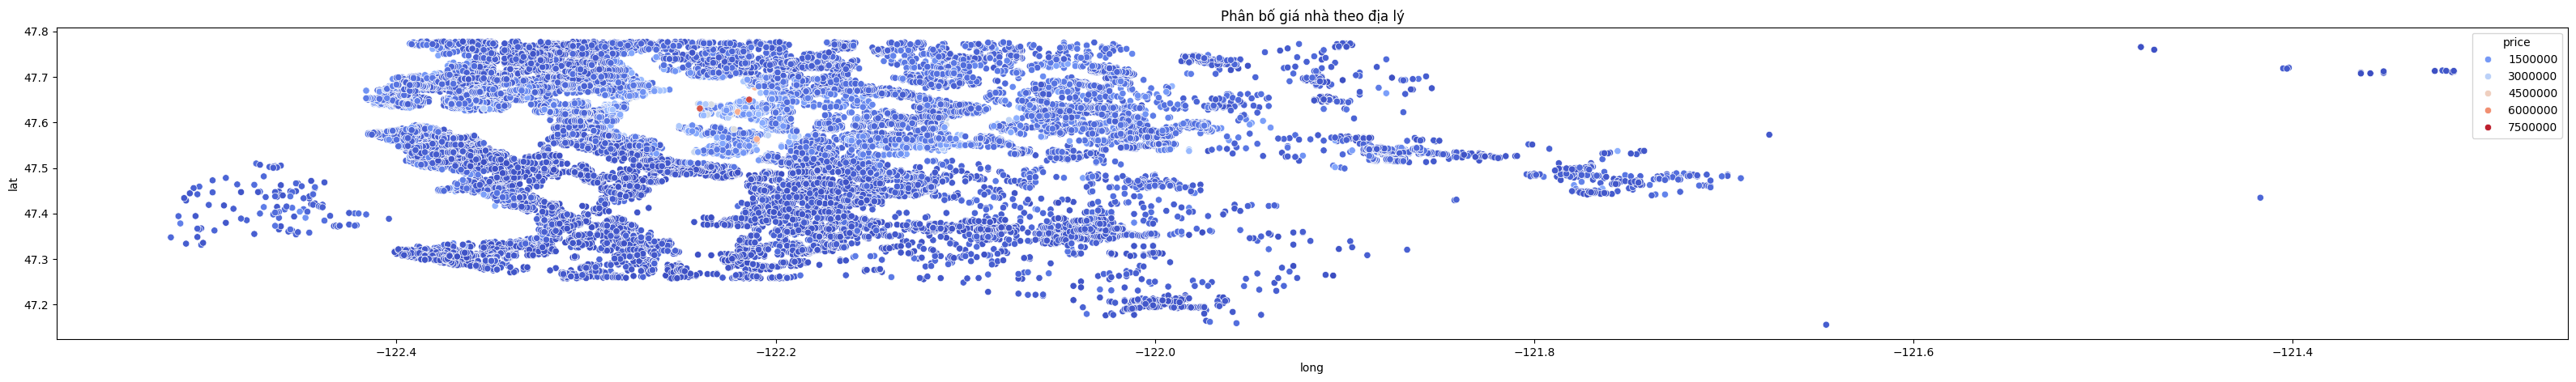

In [ ]:
# Phân bố giá nhà theo địa lý
plt.figure(figsize=(40,5))
sns.scatterplot(data=df,x='long', y='lat', hue='price', palette='coolwarm')
plt.title('Phân bố giá nhà theo địa lý')
plt.show()

Sự phân bố giá nhà qua lat và long cho thấy mối quan hệ phi tuyến tính mạnh mẽ và mang tính cụm, xác nhận rằng vị trí địa lý là yếu tố dự báo giá quan trọng nhất.
Sự Tập Trung Giá Cao

Vị trí: Giá nhà cao nhất tập trung ở một số khu vực địa lý rất hẹp, không phân bố ngẫu nhiên.Khu vực Hồ Washington (Phía Đông Seattle): Cụm giá cao nhất nằm dọc theo bờ Đông của Hồ Washington (tại vĩ độ khoảng 47.6 và kinh độ gần -122.2 đến -122.0). Đây là các khu vực giàu có như Medina, Bellevue và Kirland.

Đường bờ biển: Giá nhà cao có xu hướng bám theo các khu vực ven biển hoặc bờ hồ, cho thấy yếu tố waterfront (và các tiện ích liên quan) là động lực chính của giá.

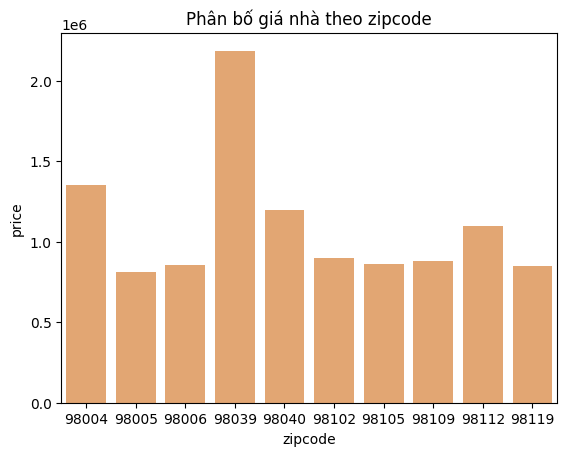

In [ ]:
# Giá theo zipcode
# Lấy ra top 10 cao nhất
price_zipcode = df.groupby('zipcode')['price'].mean().nlargest(10)
sns.barplot(x= price_zipcode.index, y= price_zipcode.values, color = '#F4A460')
plt.xlabel('zipcode')
plt.ylabel('price')
plt.title('Phân bố giá nhà theo zipcode')
plt.show()

1. Sự chênh lệch giá khổng lồ
* Giá nhà trung bình ở top 5 zipcode này dao động trong khoảng từ $1 triệu đến $2.2 triệu
*  Có sự khác biệt lớn giữa các zipcode hàng đầu 98039 có giá trung bình cao hơn đáng kể so với zipcode đứng thứ 10 98005
* Điều này chứng minh rằng zipcode không chỉ phân loại vị trí mà còn phân đoạn thị trường thành các phân khúc giá hoàn toàn khác nhau.
* Các zipcode này ( như 98039, 98004, 90040 ) đều là các khu vực ven Hồ Washington hoặc gần trung tâm Seattle ( như Medina, Bellevue, Mercer Island)
* Phân tích này hỗ trợ nhận xét từ biểu đồ lat/long trước đó: giá trị cao tập trung ở các cụm địa lý ưu tiên.

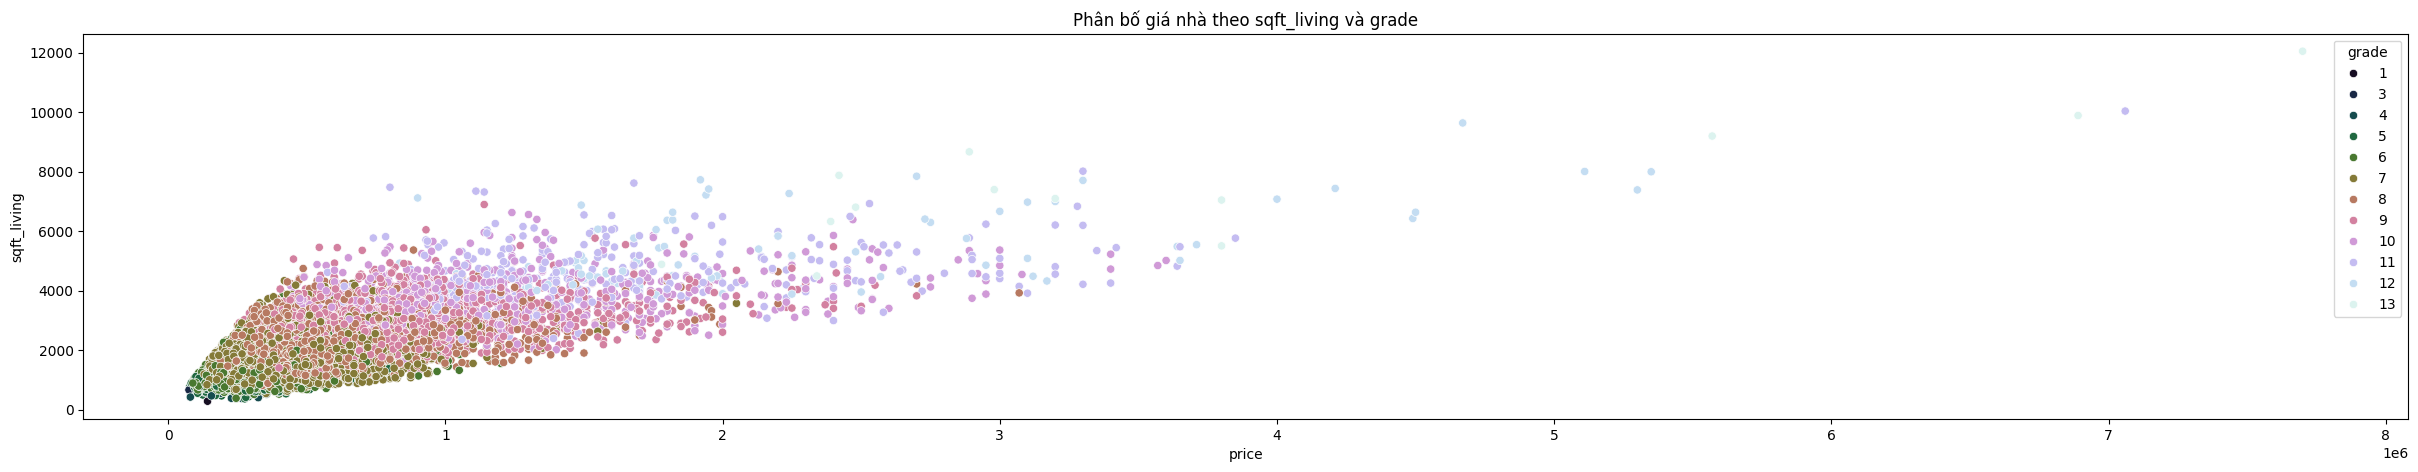

In [ ]:
plt.figure(figsize=(30,5))
sns.scatterplot(data= df, y='sqft_living', x='price', hue ='grade',palette= 'cubehelix')
plt.title('Phân bố giá nhà theo sqft_living và grade')
plt.show()

 Có một mối quan hệ tuyến tính dương rõ ràng giữa sqft_living và price. Khi diện tích phòng ở tăng, giá nhà có xu hướng tăng theo một cách nhất quán. Điều này xác nhận hệ số tương quan mạnh (0.7) trước đó.

 Khi Cấp độ (Grade) xây dựng tăng lên (phản ánh chất lượng vật liệu, thiết kế, tay nghề thi công), Giá bất động sản tăng vọt. Giá nhà cao thì grade cũng cao (>8)

 Grade thấp -> vật liệu cơ bản, thiết kế đơn giản -> đơn giá/sqft thấp.

 Grade cao -> vật liệu nhập khẩu, thiết kế kiến trúc sư, hoàn thiện tinh xảo -> đơn giá/sqft rất cao.

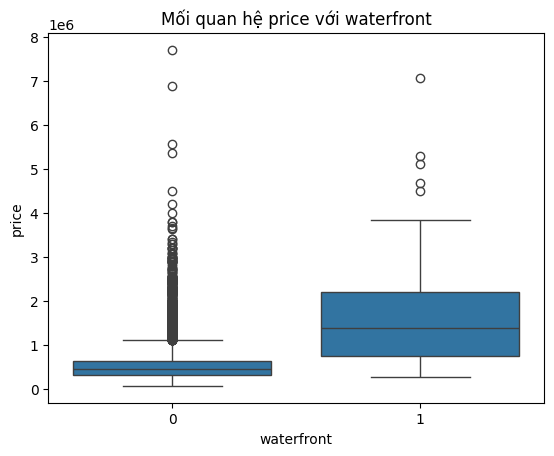

In [ ]:
# Mối quan hệ giá với waterfront
sns.boxplot(data= df, x= 'waterfront', y = 'price')
plt.title('Mối quan hệ price với waterfront')
plt.show()

Nhóm 0 (Không): Hộp rất hẹp, cho thấy 50% số nhà không có Waterfront có mức g   iá khá tập trung và ở mức tương đối thấp.            
Có rất nhiều điểm ngoại lai. Điều này cho thấy mặc dù hầu hết các căn nhà không có Waterfront có giá thấp, vẫn có một số lượng đáng kể các căn nhà siêu đắt do các yếu tố khác (như grade, sqft lớn, hoặc vị trí trung tâm).     
Nhóm 1 (Có): Hộp rộng hơn đáng kể. Điều này có nghĩa là giá của các căn nhà có Waterfront dao động trong một khoảng rất lớn (từ khoảng 500k đến 2.2 triệu ).

/tmp/ipython-input-778300198.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data= df, x= 'view', y = 'price', palette= 'RdYlGn')


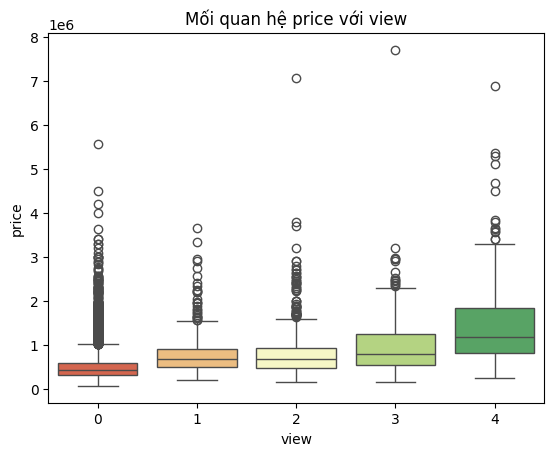

In [ ]:
# Mối quan hệ giá với view
sns.boxplot(data= df, x= 'view', y = 'price', palette= 'RdYlGn')
plt.title('Mối quan hệ price với view')
plt.show()

Sự khác biệt về giá trung vị giữa view = 0, view = 1 và view = 2 là không đáng kể. Điều này cho thấy tầm nhìn ở mức "trung bình" (1 hoặc 2) không làm tăng giá trị nhà nhiều so với "không có tầm nhìn" (0).                  

Một bước nhảy vọt về giá xảy ra ở view = 3.

Bước nhảy vọt lớn nhất xảy ra ở view = 4 (tầm nhìn tốt nhất), với giá trung vị cao hơn đáng kể so với tất cả các nhóm còn lại.              
Khi cấp độ view tăng lên, hộp càng trở nên rộng hơn (đặc biệt là ở view = 3 và view = 4).Điều này có nghĩa là khi tầm nhìn càng đẹp, biến động giá cho các căn nhà trong nhóm đó càng lớn. Những căn nhà có tầm nhìn đẹp có nhiều yếu tố khác (như sqft, grade) để đẩy giá lên cao, tạo ra một khoảng giá rộng hơn.

/tmp/ipython-input-4078936092.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data= df, x= 'bathrooms', y = 'price', palette= 'YlGn')


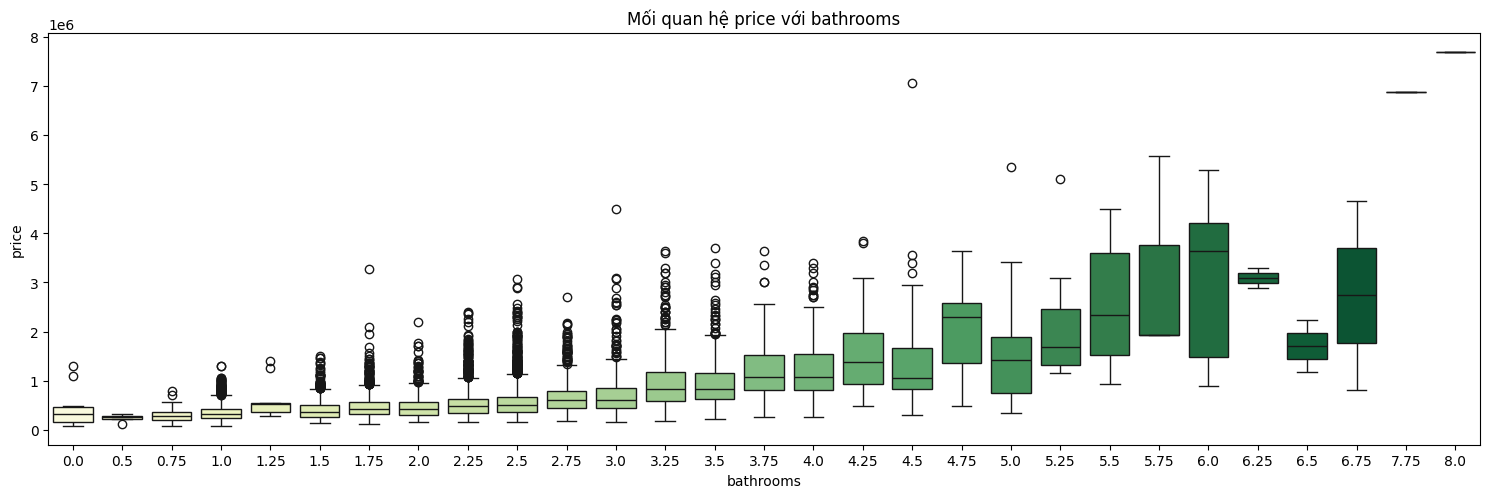

In [ ]:
# Mối quan hệ giá với bathrooms
plt.figure(figsize=(15,5))
sns.boxplot(data= df, x= 'bathrooms', y = 'price', palette= 'YlGn')
plt.tight_layout()
plt.title('Mối quan hệ price với bathrooms')
plt.show()

Khi số lượng phòng tắm tăng lên, giá trung vị  tăng lên một cách nhất quán. Điều này cho thấy bathrooms là một yếutoos có ảnh hưởng mạnh và tích cực đến giá nhà.

Biến động Giá Tăng theo: Khi số lượng phòng tắm tăng lên, chiều cao của các hộp (IQR) cũng tăng lên. Điều này có nghĩa là sự biến động về giá  lớn hơn ở những căn nhà có nhiều phòng tắm.

Ví dụ: Các căn nhà có 1.0 bathroomscó mức giá khá tập trung (hộp hẹp). Ngược lại, các căn nhà có 5 bathrooms có sự chênh lệch giá rất lớn (hộp rất cao), cho thấy chúng thuộc nhiều phân khúc khác nhau.

Số lượng Điểm Ngoại lai (Outliers): Có rất nhiều điểm ngoại lai, đặc biệt là ở nhóm có số phòng tắm phổ biến (từ 2.0 đến 3.5). Điều này cho thấy rằng, mặc dù số phòng tắm là quan trọng, có rất nhiều căn nhà có giá cao bất thường (outliers) mà không cần quá nhiều phòng tắm. Giá trị của chúng có thể được quyết định bởi các yếu tố khác (như grade cao, location đắc địa, hoặc waterfront).

Dữ liệu ở Phân khúc Cao: Khi số phòng tắm vượt quá 6.0, chúng ta thấy dữ liệu trở nên thưa thớt (ví dụ: 6.25, 6.75, 7.75). Các hộp ở đây (như 8.0) rất rộng nhưng có thể chỉ dựa trên một vài bất động sản, nên xu hướng ở đoạn cuối này không ổn định bằng đoạn đầu.

##Kỹ thuật đặc trưng

**Chuyển đổi biến mục tiêu**

Áp dụng log(price) phân bố của price có hình dạng lệch phải. Điều này có nghĩa là có một số lượng lớn các căn nhà có giá thấp, nhưng một "cái đuôi" dài của một số ít căn nhà có giá trị rất cao.

Các mô hình hồi quy tuyến tính (Linear Regression) hoạt động tốt nhất khi phần dư được phân bố chuẩn. Nếu biến mục tiêu quá lệch, mô hình sẽ bị kéo về phía các giá trị cực đoan (nhà siêu đắt) và dự đoán kém chính xác cho phần lớn các căn nhà khác.

In [ ]:
df['log_price'] = np.log(df['price'])

**Tạo thêm cột mới là house_age**

Cột gốc yr_built (năm xây dựng) không phản ánh trực tiếp sự hao mòn và thị hiếu.     
Biến đổi yr_built thành tuổi nhà (Tuổi = 2015 - yr_built). Việc này tạo ra mối quan hệ tuyến tính (âm) trực tiếp và dễ giải thích hơn với price (nhà càng cũ, giá trị càng giảm).

In [ ]:
df['house_age'] = 2015 - df['yr_built']

**Tạo thêm cột mới was_renovated**

Cột gốc yr_renovated có giá trị 0 chiếm ưu thế (biểu thị chưa cải tạo), làm sai lệch các thống kê số học.     
Biến đổi thành biến nhị phân (0/1). Mục đích là để mô hình có thể đo lường một cách rõ ràng và tách biệt tác động tăng giá của việc "đã từng cải tạo" so với việc "chưa từng cải tạo", bất kể năm cải tạo là khi nào.

In [ ]:
df['was_renovated'] = [0 if x == 0 else 1 for x in df['yr_renovated']]

In [ ]:
df[['house_age','yr_built','was_renovated','yr_renovated']].head(10)

,house_age,yr_built,was_renovated,yr_renovated
2497,24,1991,0,0
6735,68,1947,0,0
8411,63,1952,0,0
8809,85,1930,0,0
3557,64,1951,1,2013
18521,64,1951,0,0
3200,55,1960,0,0
21063,10,2005,0,0
4333,70,1945,0,0
16715,91,1924,0,0


**Tạo thêm cột distance (khoảng cách)**

chuyển đổi mối quan hệ phức tạp, phi tuyến tính của lat và long thành một biến số tuyến tính đơn giản và có ý nghĩa: khoảng cách vật lý tới khu vực giàu có nhất,  Khoảng cách càng gần -> Giá trị càng cao.

In [ ]:
# Lấy TOP 1% giá cao nhất
top1 = df.nlargest(int(len(df) * 0.01), 'price')
# Tính vị trí trung tâm
lat_center = top1['lat'].mean()
long_center = top1['long'].mean()
print("Vị trí trung tâm:", lat_center, long_center)
# Tính khoảng cách Euclid
df['distance'] = np.sqrt( (df['lat'] - lat_center)**2 + (df['long'] - long_center)**2)

Vị trí trung tâm: 47.618315887850464 -122.23903271028037


Sau khi thêm cột khoảng cách cùng với các tọa độ gốc (lat, long), ba biến này đã cùng nhau nắm bắt gần như toàn bộ giá trị dự đoán liên quan đến vị trí.


Trước khi chia tệp dữ liệu ta sẽ xoá các cột không cần thiết

In [ ]:
# Xoá các cột không cần thiết
df = df.drop(columns = ['id','date','yr_built','yr_renovated','sqft_above','sqft_living15','price'])
df.to_csv('df_cleaned',index = False);

#Phân tích dự báo

##Chia tập dữ liệu

In [ ]:
# Tách X và Y
x = df.drop(columns = 'log_price')
y = df['log_price']

In [ ]:
# Tách tập huấn luyện và tập kiểm tra
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
print('Kích thước x_train: ',x_train.shape)
print('Kích thước x_test: ',x_test.shape)

Kích thước x_train:  (17141, 17)
Kích thước x_test:  (4286, 17)


In [ ]:
# Tạo bảng tạm để tính Đơn giá (Giá/m2) theo từng khu vực Zipcode
bang_tam = x_train[['zipcode', 'sqft_living']].copy()
# Tính đơn giá cho từng căn nhà trong tập Train (Giá / Diện tích)
bang_tam['ppsf'] = y_train / bang_tam['sqft_living']
# Tính Đơn giá trung bình cho từng mã Zipcode
zip_ppsf = bang_tam.groupby('zipcode')['ppsf'].mean()
# Hàm tạo feature zipcode
def add_zip_ppsf(df_in):
    return df_in['zipcode'].map(zip_ppsf)
# Thêm feature
x_train['zip_avg_ppsf'] = add_zip_ppsf(x_train)
x_test['zip_avg_ppsf']  = add_zip_ppsf(x_test)
# Xoá cột zipcode gốc đi
x_train = x_train.drop(columns=['zipcode'])
x_test = x_test.drop(columns=['zipcode'])

##Xây dựng và huấn luyện mô hình

In [ ]:
df.shape

(21427, 18)

Biến đường thẳng thành đường cong (parabol). Giúp mô hình bắt được xu hướng giá nhà tăng vọt ở phân khúc cao cấp (phi tuyến tính) mà đường thẳng bình thường không làm được.

In [ ]:
# Xây dựng mô hình (Pipeline hoàn chỉnh)
model = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=2, include_bias=False),
    StandardScaler(),
    Ridge(alpha=1.0)
)
# Huấn luyện mô hình
model.fit(x_train,y_train)
# Dự đoán trên tập kiểm tra
y_pred_log = model.predict(x_test)
# Chuyển đổi log về đơn vị gốc
# Sử dụng hàm mũ (exp) để đưa log_price về Price
y_pred_price = np.exp(y_pred_log)
y_test_price = np.exp(y_test)

##Đánh giá mô hình

In [ ]:
n = len(y_test)     # Số lượng mẫu quan sát của tập test
k = x.shape[1]       # Số lượng biến độc lập
r2 = r2_score(y_test_price, y_pred_price)
r2_adj = 1 - (1-r2) * (n-1) / (n-k-1)
rmse = np.sqrt(mean_squared_error(y_test_price, y_pred_price))
mae = mean_absolute_error(y_test_price, y_pred_price)
mape = mean_absolute_percentage_error(y_test_price, y_pred_price)*100
print(f'Hệ số Xác định (R^2): {r2:.4f}')
print(f'Hệ số xác định hiệu chỉnh (R^2_adj): {r2_adj:.4f}')
print(f'RMSE (Sai số trung bình): ${rmse:,.2f}')
print(f'MAE (Sai số tuyệt đối TB): ${mae:,.2f}')
print(f"MAPE (Sai số Phần trăm): {mape:.2f}%")

Hệ số Xác định (R^2): 0.8704
Hệ số xác định hiệu chỉnh (R^2_adj): 0.8698
RMSE (Sai số trung bình): $132,014.22
MAE (Sai số tuyệt đối TB): $79,792.07
MAPE (Sai số Phần trăm): 15.00%


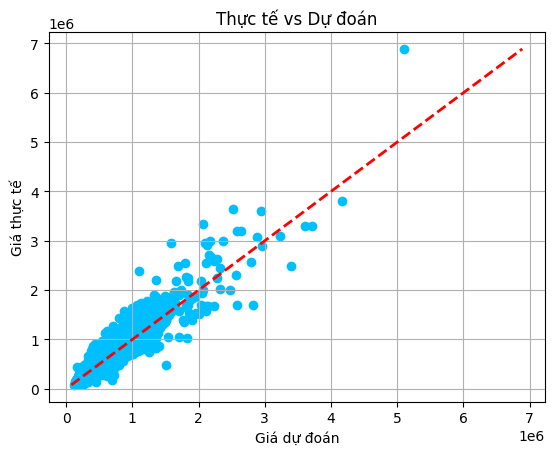

In [ ]:
# Biểu đồ 1: Thực tế vs Dự đoán (Đơn vị Price gốc)
plt.scatter(y_pred_price, y_test_price, color = '#00BFFF')
plt.plot([y_test_price.min(), y_test_price.max()], [y_test_price.min(), y_test_price.max()],
         'r--', lw=2) # Đường y=x lý tưởng
plt.title('Thực tế vs Dự đoán')
plt.xlabel('Giá dự đoán')
plt.ylabel('Giá thực tế')
plt.grid(True)
plt.show()

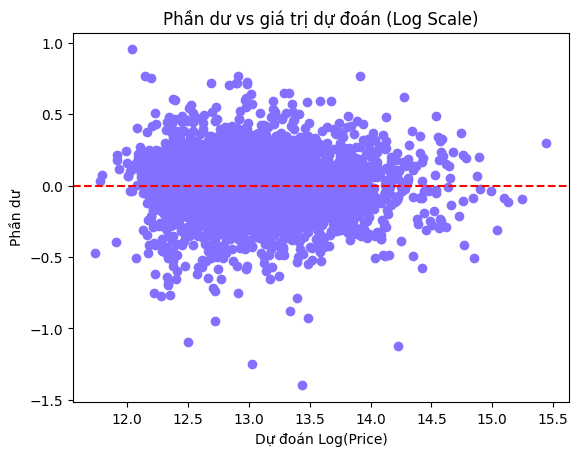

In [ ]:
residuals = y_test - y_pred_log
# Biểu đồ 2: Phần dư vs giá trị Dự đoán (Đơn vị Log_Price)
plt.scatter(y_pred_log, residuals, color = '#8470FF')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Phần dư vs giá trị dự đoán (Log Scale)')
plt.xlabel('Dự đoán Log(Price)')
plt.ylabel('Phần dư');

###Đánh giá Overfitting và Underfitting

In [ ]:
# Tính r2 trên tập huấn luyện
y_pred_train_log = model.predict(x_train)
r2_train = r2_score(y_train, y_pred_train_log)
# Tính r2 trên tập kiểm tra
y_pred_test_log = model.predict(x_test)
r2_test = r2_score(y_test, y_pred_test_log)
print(f"R^2 trên tập Huấn luyện (Train): {r2_train:.4f}")
print(f"R^2 trên tập Kiểm tra (Test): {r2_test:.4f}")

R^2 trên tập Huấn luyện (Train): 0.8683
R^2 trên tập Kiểm tra (Test): 0.8595


###Kiểm định chéo

In [ ]:
k_folds = 10
# 1. R2
r2_cv = cross_val_score(
    model,
    x_train,
    y_train,
    scoring='r2',
    cv=k_folds,
    n_jobs=-1
)
# 2. RMSE (sklearn trả về giá trị âm → phải đổi dấu)
rmse_cv = -cross_val_score(
    model,
    x_train,
    y_train,
    scoring='neg_root_mean_squared_error',
    cv=k_folds,
    n_jobs=-1
)
# 3. MAE (sklearn trả về giá trị âm → phải đổi dấu)
mae_cv = -cross_val_score(
    model,
    x_train,
    y_train,
    scoring='neg_mean_absolute_error',
    cv=k_folds,
    n_jobs=-1
)
# Tạo DataFrame tổng hợp
df_result = pd.DataFrame({
    'R2': r2_cv,
    'RMSE': rmse_cv,
    'MAE': mae_cv
})
print(f"R² CV Trung bình : {r2_cv.mean():.4f}")
print(f"R² Std Dev       : {r2_cv.std():.4f}")

print(f"RMSE Trung bình  : {rmse_cv.mean():.4f}")
print(f"RMSE Std Dev     : {rmse_cv.std():.4f}")

print(f"MAE Trung bình   : {mae_cv.mean():.4f}")
print(f"MAE Std Dev      : {mae_cv.std():.4f}")

df_result

R² CV Trung bình : 0.8621
R² Std Dev       : 0.0073
RMSE Trung bình  : 0.1943
RMSE Std Dev     : 0.0036
MAE Trung bình   : 0.1453
MAE Std Dev      : 0.0025


,R2,RMSE,MAE
0,0.869028,0.190839,0.143663
1,0.864270,0.197550,0.147369
2,0.850538,0.197941,0.144263
3,0.852011,0.201806,0.151698
4,0.876201,0.191198,0.143900
5,0.865173,0.194642,0.146979
6,0.865064,0.189607,0.142928
7,0.858388,0.194080,0.144550
8,0.858023,0.192437,0.143511
9,0.862711,0.192863,0.144132


In [ ]:
# 1. Lưu mô hình đã huấn luyện
import joblib
joblib.dump(model,'housing_model.pkl')
# 2. Lưu bảng tra cứu Zipcode -> Zip_avg_ppsf
joblib.dump(zip_ppsf.to_dict(), 'zip_ppsf.pkl')
center_coords = {
    'lat': 47.618315887850464,
    'long': -122.23903271028037
}
joblib.dump(center_coords, 'center_coords.pkl')
# 3. Lưu tạo độ tâm
center_coords = {
    'lat': 47.618315887850464,
    'long': -122.23903271028037
}
joblib.dump(center_coords, 'center_coords.pkl')

['center_coords.pkl']

In [ ]:
import joblib
import numpy as np
import json

# 1. Load files
model = joblib.load('housing_model.pkl')
zip_dict = joblib.load('zip_ppsf.pkl') # Corrected filename from 'zip_avg_ppsf.pkl'
center = joblib.load('center_coords.pkl')

print("// --- COPY TO constants.ts ---")

# 2. Convert Center Coords
print(f"export const CENTER_COORDS = {{ lat: {center['lat']}, long: {center['long']} }};")
print("")

# 3. Convert Zip Dictionary
# Convert numpy/int types to standard python types for JSON serialization
clean_zip_dict = {str(k): float(v) for k, v in zip_dict.items()}
print(f"export const ZIP_AVG_PPSF: Record<string, number> = {json.dumps(clean_zip_dict, indent=2)};")
print(f"export const DEFAULT_AVG_PPSF = {np.mean(list(clean_zip_dict.values()))};")
print("")

# 4. Convert Model Weights
# Access the Ridge model within the pipeline to get intercept_ and coef_
print(f"export const MODEL_INTERCEPT = {model.named_steps['ridge'].intercept_};")
print(f"export const MODEL_WEIGHTS = {json.dumps(model.named_steps['ridge'].coef_.tolist())};")

// --- COPY TO constants.ts ---
export const CENTER_COORDS = { lat: 47.618315887850464, long: -122.23903271028037 };

export const ZIP_AVG_PPSF: Record<string, number> = {
  "98001": 0.007403822109346439,
  "98002": 0.008451900782565469,
  "98003": 0.00725122866054817,
  "98004": 0.005985582539739202,
  "98005": 0.00570962273287465,
  "98006": 0.005462940674836459,
  "98007": 0.006820146605035297,
  "98008": 0.007011974995199509,
  "98010": 0.007418329096195067,
  "98011": 0.006376436650098193,
  "98014": 0.007751246200122855,
  "98019": 0.006700467059006904,
  "98022": 0.007641694063160859,
  "98023": 0.007028845516438917,
  "98024": 0.007214198509232464,
  "98027": 0.006102383986480259,
  "98028": 0.006785009552183165,
  "98029": 0.006360264311360275,
  "98030": 0.006833903078897695,
  "98031": 0.007071901381270554,
  "98032": 0.007957585982201178,
  "98033": 0.006609959252947025,
  "98034": 0.007374206723044873,
  "98038": 0.006469476530258956,
  "98039": 0.004317794128203095,
  "98